# Análise exploratória dos dados da base Bias_correction_ucl.csv

Este notebook traz a análise exploratória feita nos dados disponibilizados para o desafio da vaga de Engenheiro de Dados do CESAR. A análise abrange os seguintes tópicos:
1. Análise e tratamento de valores nuloes
2. Análise de outliers e distribuição dos dados
3. Análise de correlação

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno
from pycaret.classification import *
%matplotlib inline

In [25]:
df = pd.read_csv('../../dataset/Bias_correction_ucl.csv', sep=',')

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [26]:
print(df.index.unique())
df.dtypes

RangeIndex(start=0, stop=7752, step=1)


station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

Tem-se a coluna **station** contem dados discretos , a coluna **Date** com dados de data e as demais 22 colunas apresentam dados contínuos

### Análise de distribuição de nulos

Para uma análise mais dinâmica sobre a distribuição de nulos utilizei a biblioteca **missingno** 

Contagem de nulos por colunas do dataset

In [27]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Esta contagem pode ser vista em forma gráfica como mostrado abaixo.

<AxesSubplot:>

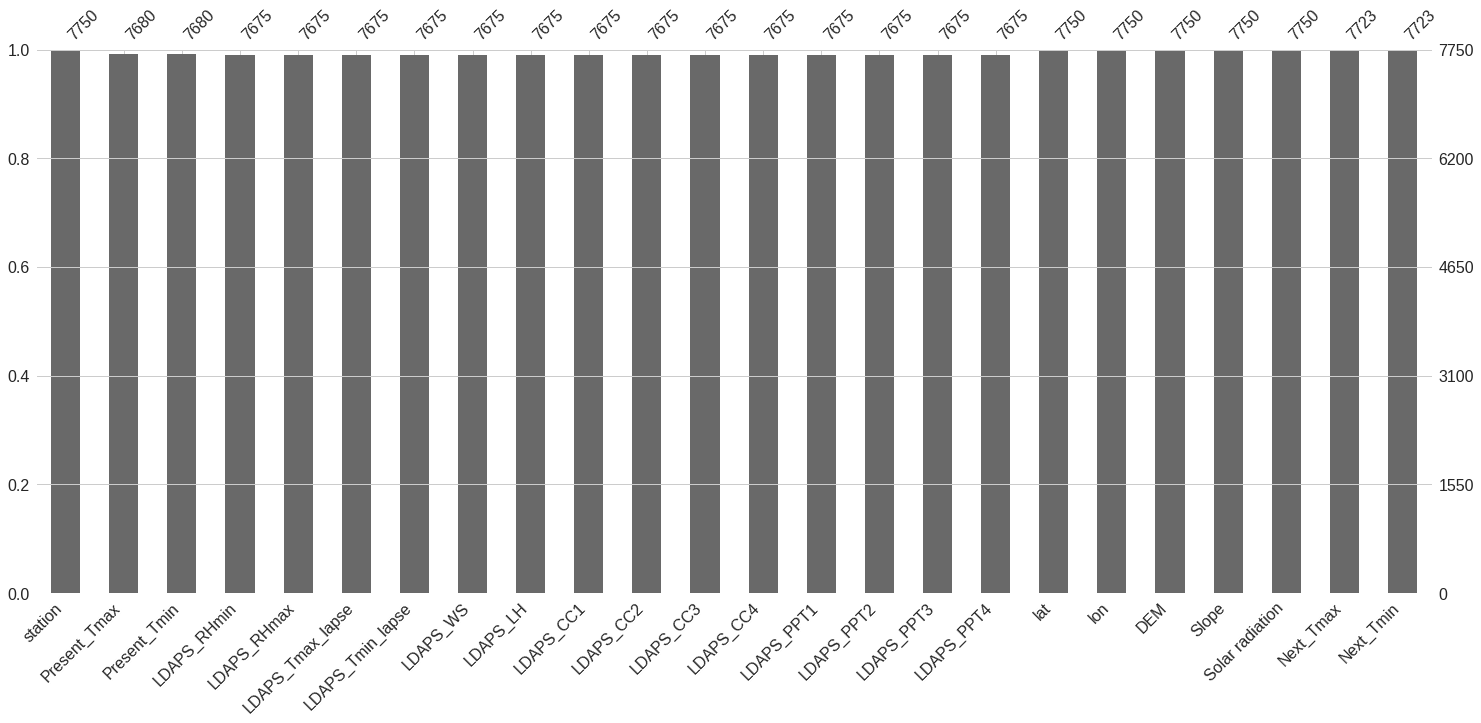

In [94]:
msno.bar(df)

As colunas que apresentam maior contagem de nulos são as que contem o prefixo LDAPS. Estas são referentes aplicação de um modelo preditivo para informações relacionadas ao ambiente, o que pode indicar uma falha de predição modelo tendo em vista que a quantidade de nulos é igual para todas.

Como o dataset apresenta uma contagem de 2 linhas contendo valores nulos para a coluna **Date**, estas foram removidas considerando que não afetaria na predição. 

In [28]:
#Remoção de linhas com data nula
df = df[df['Date'].notna()]
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


<AxesSubplot:>

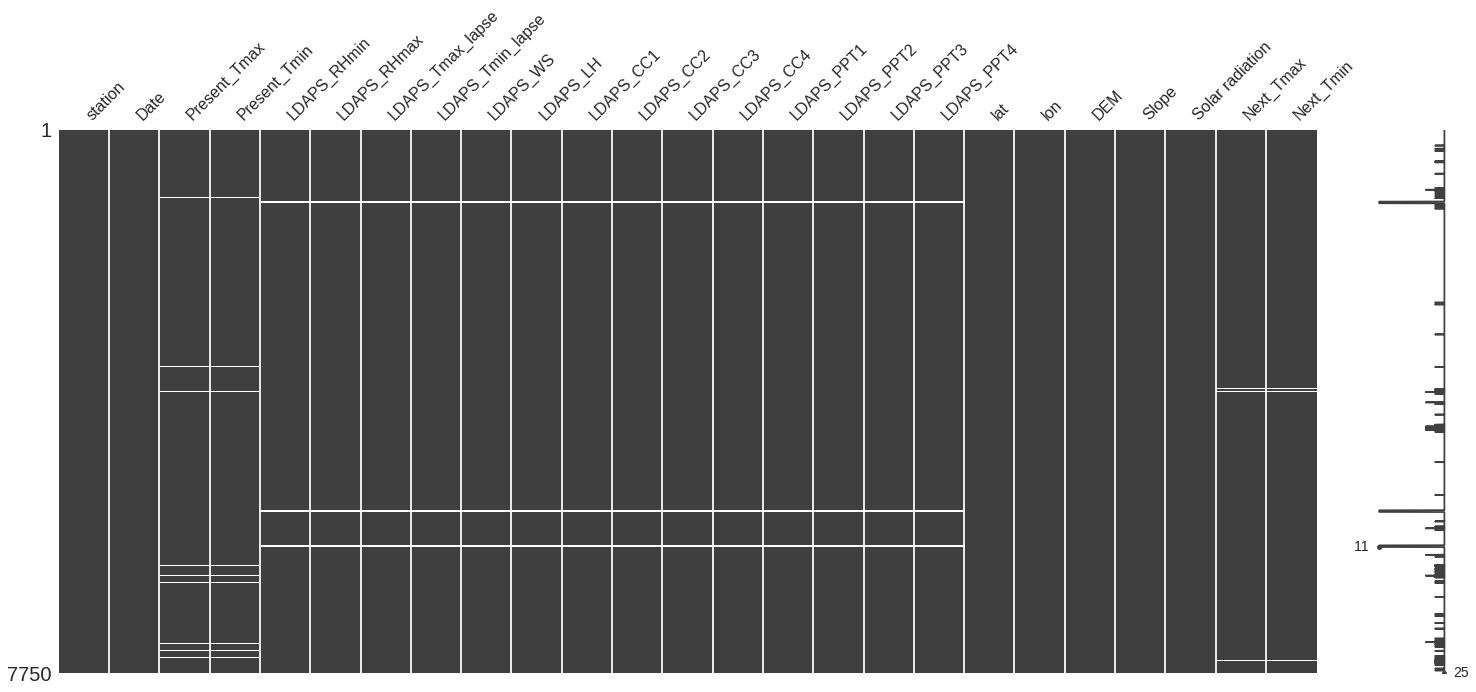

In [29]:
# msno.matrix(df.set_index(pd.period_range('2013-06-30', '2015-06-30', freq='M')), freq='BQ')

msno.matrix(df)

As variáveis criadas utilizando **LDAPS** apresentam uma mesma distribuição de nulos no dataset, reforçando a hipótese para uma possível falha de predição do modelo para estes momentos. As variáveis **station, lat, lon, DEM, Slope, Solar radiation** aparentam estar totalmente populadas enquanto as variáveis **Present_Tmax, Present_Tmin, Newt_Tmax e Next_Tmin** apresentam uma distribuição esparsa dentre as linhas no inicio do dataset e mais próximas ao fim deste. Como **Present_Tmax e Present_Tmin** são variáveis relacionadas à coleta da temperatura do ar no dia isto pode indicar que houve um problema ou falta da coleta em datas específicas. O mesmo se aplica as variáveis **Newt_Tmax e Next_Tmin** que referem a temperatura do dia seguinte ao observado.

<AxesSubplot:>

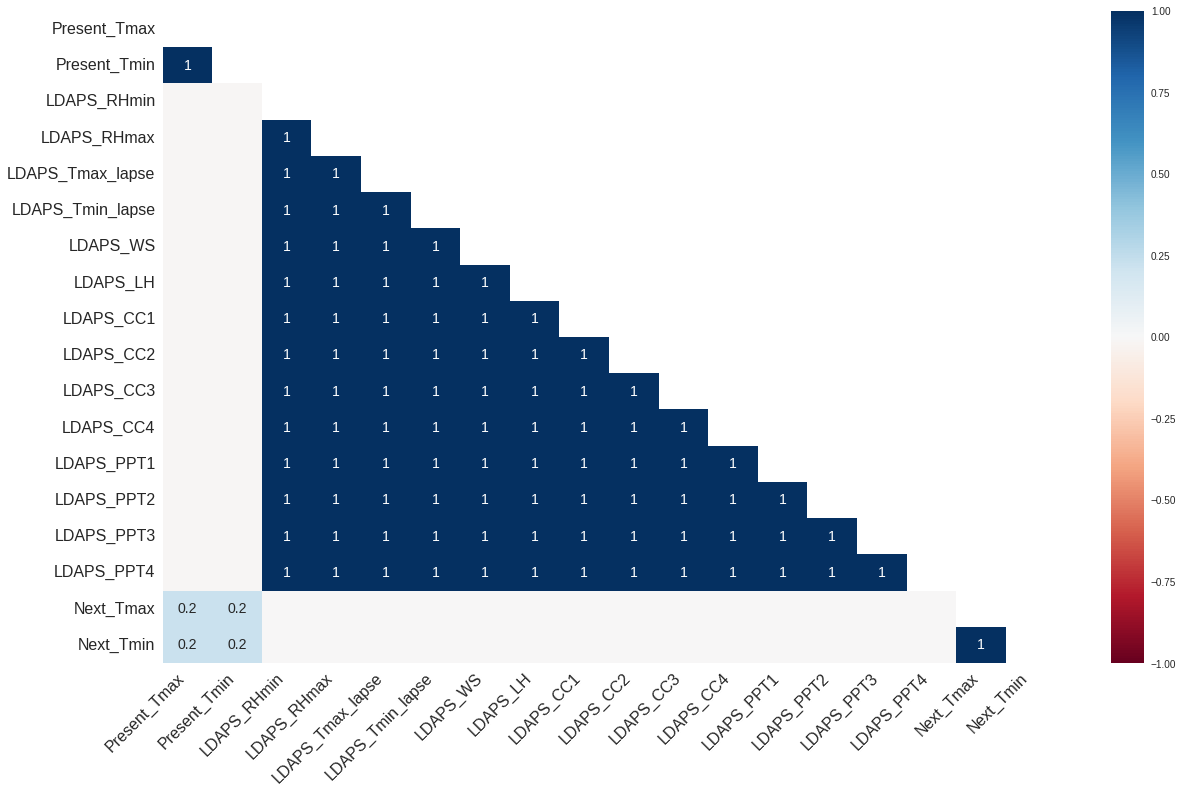

In [95]:
msno.heatmap(df)

Nesse gráfico tem-se a correlação entre nulos, como visto anteriormente as colunas LDAPS possuem uma grande correlação de nulos entre si. As colunas **Next_Tmax, Next_Tmin, Previous_Tmax e Present_Tmin** apresentam uma baixa correlação de nulos, indicando que estes valores faltantes não apresentam um forte relacionamento.

Por ser um dado temporal e ser trabalhado em temperaturas a variação não deve ser muita, logo pode-se inferir o valor da target que está nulo por interpolação das médias analisando o estado anterior e posterior. Abaixo temos uma das linhas em que ocorreu a interpolação (**831**) e os estados anteriores e posteriores 


In [30]:
df['Next_Tmax'] = df['Next_Tmax'].interpolate(method='linear')
df['Present_Tmax'] = df['Present_Tmax'].interpolate(method='linear')
df['Present_Tmin'] = df['Present_Tmin'].interpolate(method='linear')
df.iloc[[830,831,832]]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
830,6.0,2013-08-02,29.4,25.7,67.495590,87.607582,29.662294,26.519021,8.175170,34.380867,0.382843,0.386578,0.394699,0.179816,0.000000,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5379.994141,33.0,26.9
831,7.0,2013-08-02,29.6,25.8,76.202255,94.058517,28.842727,26.442801,7.980686,87.715882,0.442766,0.342353,0.333352,0.227664,0.086539,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5357.705566,32.9,NaN
832,8.0,2013-08-02,30.4,26.4,67.476746,92.119804,29.049472,26.312093,8.362006,30.248168,0.355978,0.318236,0.376368,0.240596,0.000000,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5365.518555,32.8,26.8


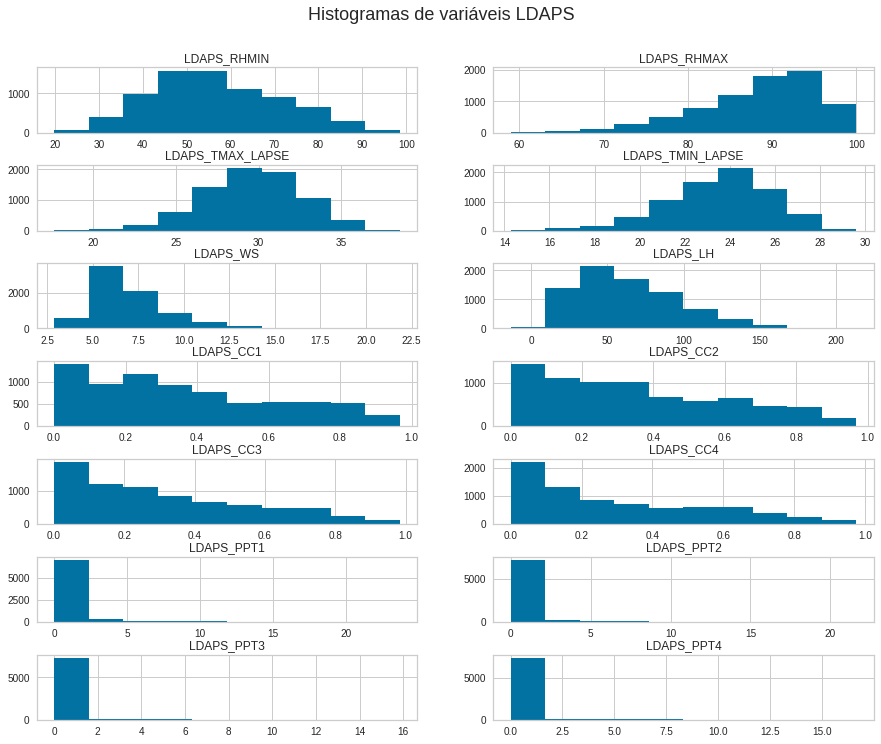

In [21]:
# Plotando apenas as features produzidas pelo modelo LDAPS
ldaps_cols = ['LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Histogramas de variáveis LDAPS", fontsize=18, y=0.95)


for ticker, ax in zip(ldaps_cols, axs.ravel()):
    df[ticker].hist(ax=ax)
    ax.set_title(ticker.upper())
    ax.set_xlabel("")

plt.show()

In [31]:
df[ldaps_cols] = df[ldaps_cols].apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.median())
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Conforme observado nos histogramas das colunas, por se tratarem de valores resultantes dos modelos decidi por usar a mediana para tratamento de nulos.

In [255]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.770665,23.229239,56.742104,88.390831,29.614712,23.515389,7.091188,62.440791,0.368230,0.355625,0.317819,0.298451,0.583360,0.477644,0.273535,0.264721,37.544720,126.991400,61.854944,1.256692,5341.549330,30.273910,22.933419
std,7.211568,2.966484,2.406437,14.586073,7.150356,2.928370,2.331006,2.167185,33.520913,0.261148,0.256752,0.249099,0.253104,1.919557,1.738607,1.143042,1.186283,0.050335,0.079406,54.256953,1.369833,428.996445,3.124258,2.478871
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.048225,84.318649,27.693733,22.115268,5.686498,37.547426,0.148339,0.142424,0.103113,0.082777,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.032715,93.703491,31.682567,25.133460,8.005363,83.891182,0.571665,0.554910,0.493971,0.497218,0.049102,0.016720,0.007199,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


## Análise exploratória

### Análise de outliers

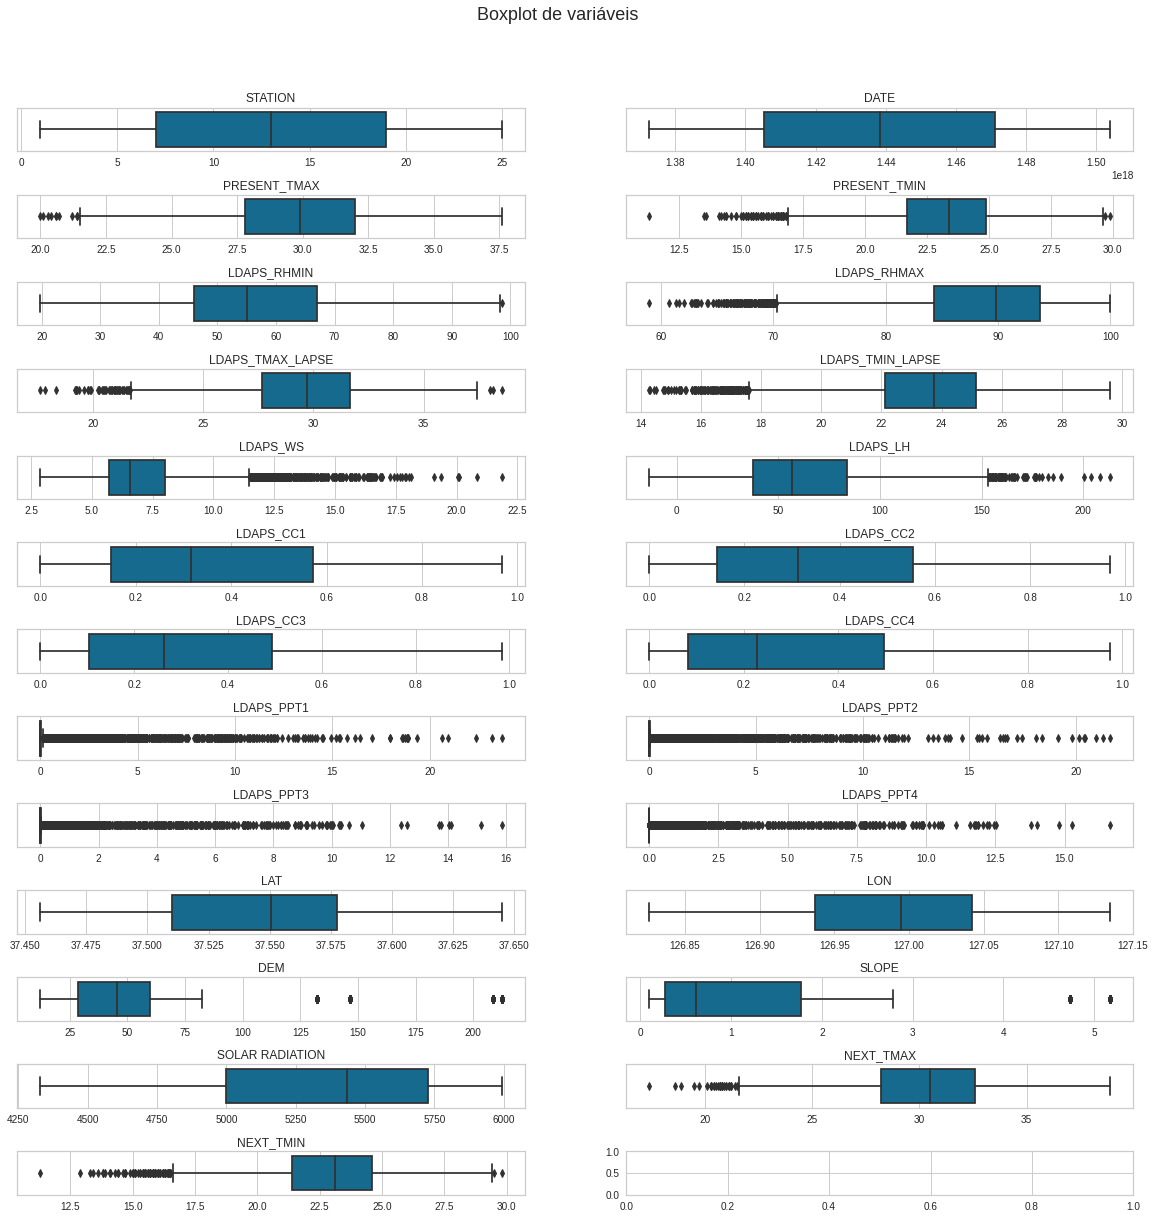

In [171]:
cols = df.columns
fig, axs = plt.subplots(nrows=13, ncols=2, figsize=(20, 20))
plt.subplots_adjust(hspace=1)
fig.suptitle("Boxplot de variáveis", fontsize=18, y=0.95)


for ticker, ax in zip(cols, axs.ravel()):
    sns.boxplot(x = df[ticker], ax=ax)
    ax.set_title(ticker.upper())
    ax.set_xlabel("")

plt.show()

Optei por remover as variáveis que apresentavam um grande número de outliers e que não apresentavam qualquer correlação com a variável resposta, nesse caso foram as variáveis **LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 e LDAPS_PPT4**

In [32]:
df.drop(['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4'], inplace=True, axis=1)
# df.to_csv('../dataset/Bias_correction_ucl_treated.csv', sep=',', index=False)

Outra possibilidade de ferramenta para análise de outliers é utilizando o DBScan que realiza uma clusterização de valores principais e identifica os possíveis outliers fora destes clusters. Por conta do tempo limitado optei por realizar uma abordagem mais direta e simples.

#### Tratamento de Outliers

Uma possibilidade de tratamento de outliers é o uso de np.log1p, tendo em vista que ele soma +1 no valor e aplica o log nas variáveis, garantindo que não tem um log de 0 e transformando o a distribuição para uma gaussiana que pode ser utilizada em um modelo linear. Abaixo são apresentados dois plots para demonstrar a diferença dos plots.

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Count'>

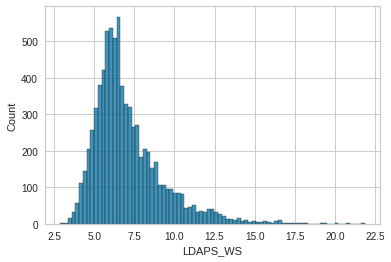

In [181]:
sns.histplot(df['LDAPS_WS'])

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Count'>

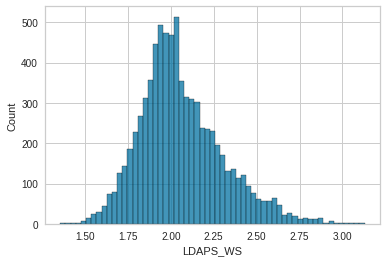

In [185]:
sns.histplot(np.log1p(df['LDAPS_WS']))

Outra forma de tratar outliers é trazer ("chapando") os valores para dentro dos limites superior e inferior (máximo e mínimo das barras) do box. Para isso utilizei o método Tukey para identificação destes limites.

In [1]:
df.boxplot

NameError: name 'df' is not defined

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Count'>

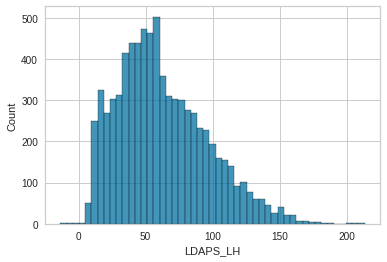

In [197]:
sns.histplot(df['LDAPS_LH'])

In [33]:
q1 = df["LDAPS_LH"].quantile(0.25)
q3 = df["LDAPS_LH"].quantile(0.75)

iqr = q3 - q1

limite_inferior = q1 - (1.5 * iqr)
limite_superior = q3 + (1.5 * iqr)

df[df["LDAPS_LH"] <= limite_inferior]["LDAPS_LH"] = limite_inferior
df[df["LDAPS_LH"] >= limite_superior]["LDAPS_LH"] = limite_superior

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

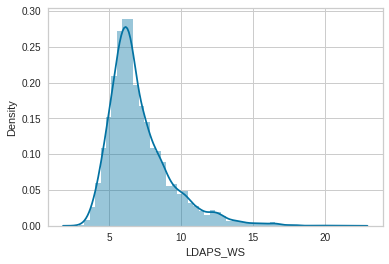

In [199]:
sns.distplot(df['LDAPS_WS'])

Esta abordagem permite que os valores sejam distribuidos em uma Gaussiana, o que para modelos lineares seria o cenário ideal para predição. Contudo, para o treinamento do modelo não irei aplicar estas correções tendo em vista a variedade de modelos a serem testados pelo Pycaret.

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

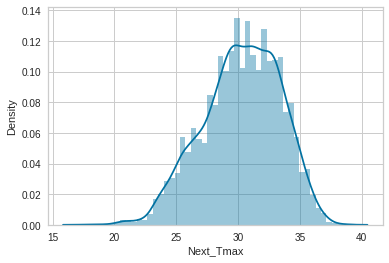

In [34]:
# plot histogram
sns.distplot(df['Next_Tmax'])

Ao observarmos a distribuição da variável resposta **Next_Tmax** percebemos uma tendencia a uma gaussiana, cuja maior concentração de valores encontra-se entre 26 e 32, com valor médio geral de 30.2º como visto na função describe do dataframe.

### Análise em função do tempo

array(['2013-06', '2013-07', '2013-08', '2014-06', '2014-07', '2014-08',
       '2015-06', '2015-07', '2015-08', '2016-06', '2016-07', '2016-08',
       '2017-06', '2017-07', '2017-08'], dtype=object)

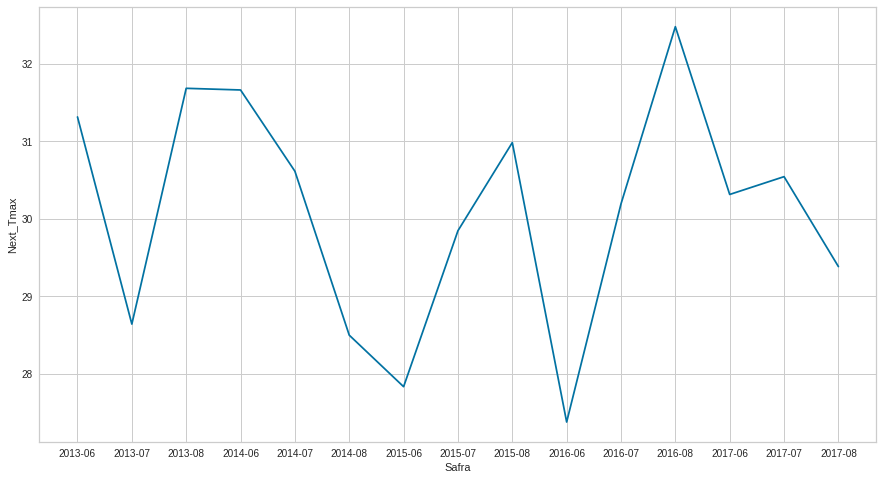

In [78]:
# Análise de variação da target em função do tempo
plt.figure(figsize=(15, 8))
df['Safra'] = df['Date'].dt.strftime('%Y-%m')
sns.lineplot(data=df.groupby(['Safra']).mean(), y = 'Next_Tmax', x= 'Safra')
# ax.set(xticks=df['Safra'].unique())
plt.xticks(np.unique(df["Safra"]))
df['Safra'].unique()

### Análise de correlação de variáveis utilizando Pearson

<AxesSubplot:>

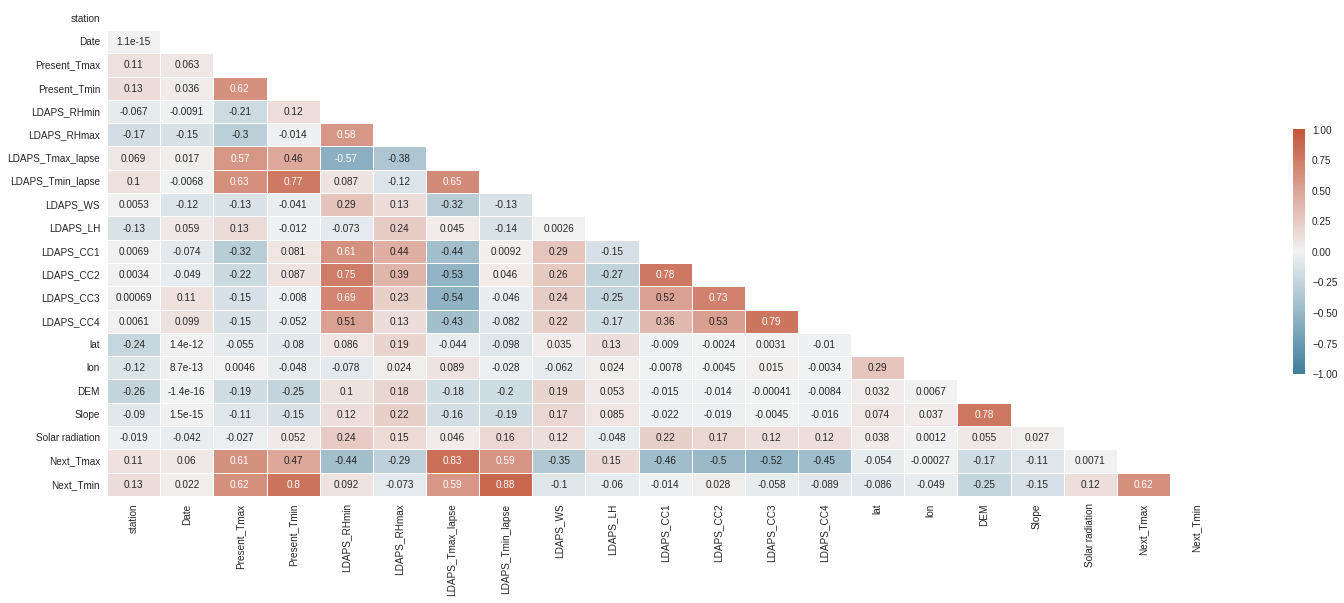

In [203]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            linewidths=.5, annot=True, cbar_kws={"shrink": .5})


<AxesSubplot:>

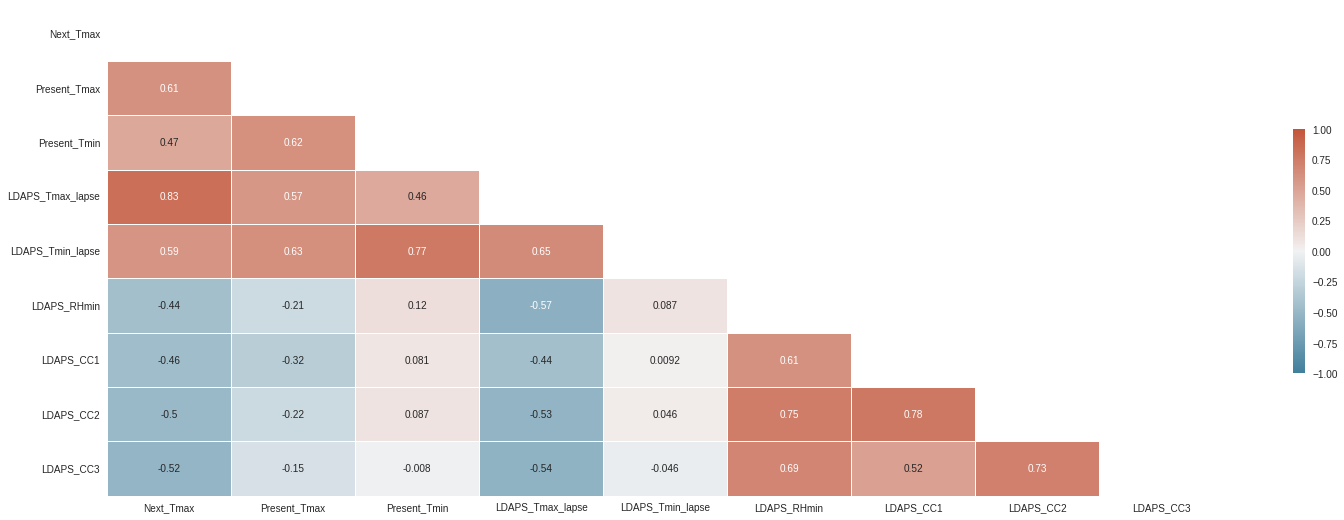

In [267]:

corr_vars = ['Next_Tmax', 'Present_Tmax', 'Present_Tmin', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_RHmin', 'LDAPS_CC1','LDAPS_CC2', 'LDAPS_CC3']
df_filtered = df.filter(corr_vars)
corr = df_filtered.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            linewidths=.5, annot=True, cbar_kws={"shrink": .5})

Por uma questão exploratória, escolhi variáveis que apresentavam correlação com a resposta superior 0.4 (positiva e negativamente), um valor mais conservador a ser utilizado seria de 0.6, porém como o intuito é um teste exploratório resolvi manter um valor mais baixo. Diante disso, em um cenário treinamento de um modelo com features escolhidas baseadas em correlação, as escolhidas seriam: **Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_RHmin, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3**

<AxesSubplot:xlabel='Next_Tmax', ylabel='Present_Tmax'>

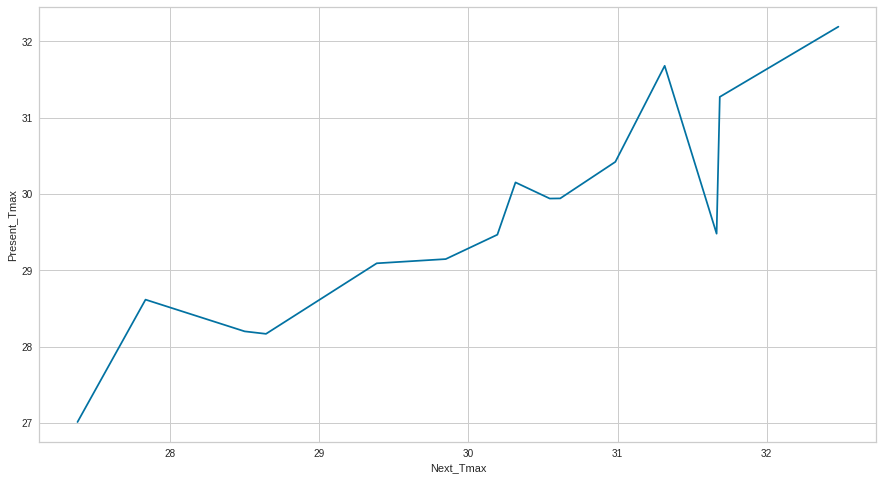

In [65]:
# Análise de variação da target em função do tempo
plt.figure(figsize=(15, 8))
sns.lineplot(data=df.groupby(['Safra']).mean(), y = 'Present_Tmax', x= 'Next_Tmax')

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

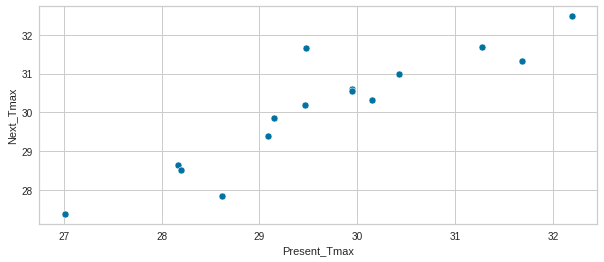

In [64]:
fig = plt.figure(figsize=(10,4))
sns.scatterplot(data=df.groupby(['Safra']).mean(), x = 'Present_Tmax', y= 'Next_Tmax')

Ao analisarmos a relação entre as variáveis Present_Tmax e Next_Tmax tanto no scatterplot quanto na plotagem de linhas em safras vemos que tem uma relação com tendência crescente, com isso o modelo pode estabelecer a relação de que caso a temperatura atual esteja em torno de 30º a temperatura do dia seguinte também estará em torno disso. Como se trata de uma série temporal essa inferência faz sentido, já que um valor mantem a mesma tendência por um período de tempo.

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

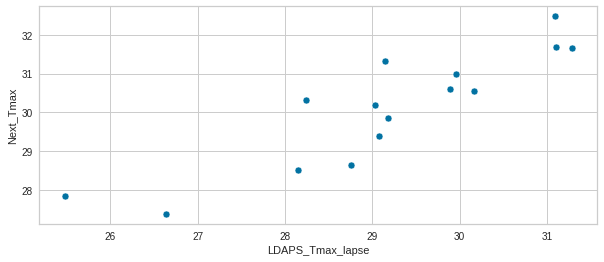

In [76]:
fig = plt.figure(figsize=(10,4))
sns.scatterplot(data=df.groupby(['Safra']).mean(), x = 'LDAPS_Tmax_lapse', y= 'Next_Tmax')

A mesma observação anteriormente se aplica a análise das variáveis LDAPS_Tmax_lapse em função da target, onde há uma tendência de crescimento.

### Considerações

A análise foi realizada de forma simples e um tanto superficial dado o tempo disponível para elaboração do projeto. Contudo, esta análise já nos permite ver as distribuições dos dados e as correlações das variáveis de modo a observarmos certos padrões em determinadas variáveis. Alguns avanços que poderiam ser feitos seria a aplicação de técnicas mais robustas para verificação de nulos (como o já citado DBScans) e a utilização de métricas estatísticas para avaliação de colinearidade entre as variáveis, como o Variance Inflaction Factor (VIF). Além disso poderia ser feita uma análise de correlação mais aprofundada de distribuição das variáveis em função do tempo e análises comparativas entre elas para identificação de algum padrão perdido ou de variáveis que explicam a mesma coisa no modelo.